In [1]:
import math
import numpy as np
import scipy.stats as scs 
import matplotlib.pyplot as plt 
import numpy.random as random
from copy import copy
import seaborn as sns
sns.set_theme()

# Partie 1

In [2]:
pi = np.array([0.2,0.5,0.3])
P = np.array([[1/3,1/2,1/6], [1/4,0,3/4], [0,1/2,1/2]])

In [3]:
P

array([[0.33333333, 0.5       , 0.16666667],
       [0.25      , 0.        , 0.75      ],
       [0.        , 0.5       , 0.5       ]])

In [4]:
def verifier_proba(pi):
    return (all([x >= 0 for x in pi]) and (np.isclose(np.sum(pi), 1)))

def verifier_matrice_sto(P):
    return all([verifier_proba(y) for y in P])


In [5]:
verifier_proba(pi)

True

In [6]:
verifier_matrice_sto(P)

True

In [7]:
def loi_marginale(P, pi0, n):
    return np.matmul(pi0 , np.linalg.matrix_power(P, n))

In [8]:
loi_marginale(P, pi, 3)

array([0.13587963, 0.3125    , 0.55162037])

In [11]:
def transition(P, a, u):
    S = 0
    k = 0
    while S<u:
        S += P[a][k]
        k += 1
    return k

In [12]:
def chaine_markov(P, pi0, n):
    res = []
#     etat initial
    state = transition(np.array([pi0]),0,random.random())
    for i in range(n):
        newstate = transition(P, state-1, random.random())
        res.append(newstate)
        state = newstate
    return res

In [14]:
chaine_markov(P, pi, 30)

[1,
 2,
 3,
 3,
 3,
 2,
 1,
 1,
 2,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3]

# Partie 2

In [15]:
pi10 = loi_marginale(P, pi, 10)
pi10

array([0.12495329, 0.33349609, 0.54155062])

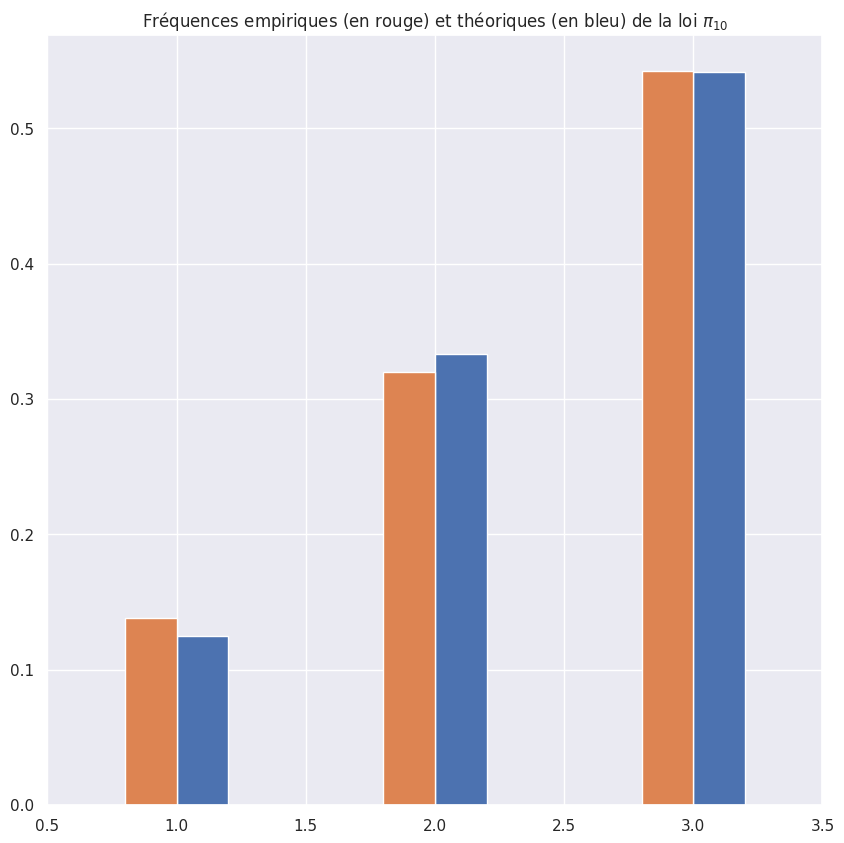

In [52]:
simulations = [chaine_markov(P, pi, 10)[-1] for i in range(1000)]
frequences = np.array([simulations.count(i)/1000 for i in [1,2,3]])
fig, ax = plt.subplots(figsize=(10,10))
ax.bar([1,2,3], pi10, width=0.2, align="edge", color=sns.color_palette()[0])
ax.bar([1,2,3], frequences, width=-0.2, align="edge", color=sns.color_palette()[1])
ax.set_title("Fréquences empiriques (en rouge) et théoriques (en bleu) de la loi $\pi_{10}$")
ax.set_xlim([0.5,3.5])
plt.show()

In [13]:
loi_marginale(P, pi, 100)

array([0.125     , 0.33333333, 0.54166667])

In [16]:
np.linalg.eig(P)

EigResult(eigenvalues=array([-0.5       ,  0.33333333,  1.        ]), eigenvectors=array([[ 0.40824829,  0.95622553,  0.57735027],
       [-0.81649658,  0.09253795,  0.57735027],
       [ 0.40824829, -0.27761386,  0.57735027]]))

In [14]:
np.linalg.eig(P.T)

EigResult(eigenvalues=array([ 1.        ,  0.33333333, -0.5       ]), eigenvectors=array([[-1.92847304e-01, -7.07106781e-01,  2.38667185e-01],
       [-5.14259477e-01,  4.94450893e-17, -7.95557284e-01],
       [-8.35671650e-01,  7.07106781e-01,  5.56890099e-01]]))

In [15]:
v = ((np.linalg.eig(P.T)[1]).T)[0]
v/np.sum(v)

array([0.125     , 0.33333333, 0.54166667])

In [16]:
[1/8,1/3,13/24]

[0.125, 0.3333333333333333, 0.5416666666666666]

In [17]:
def frequences_empiriques(P, pi0, n):
    N = len(pi0)
    X = chaine_markov(P, pi0, n)
    res = np.zeros((N, n))
    for i in range(n):
        res[X[i]-1, i] += 1
    res2 = np.cumsum(res, axis=1)
    return res2*np.array([[1/(j+1) for j in range(n)] for i in range(N)])

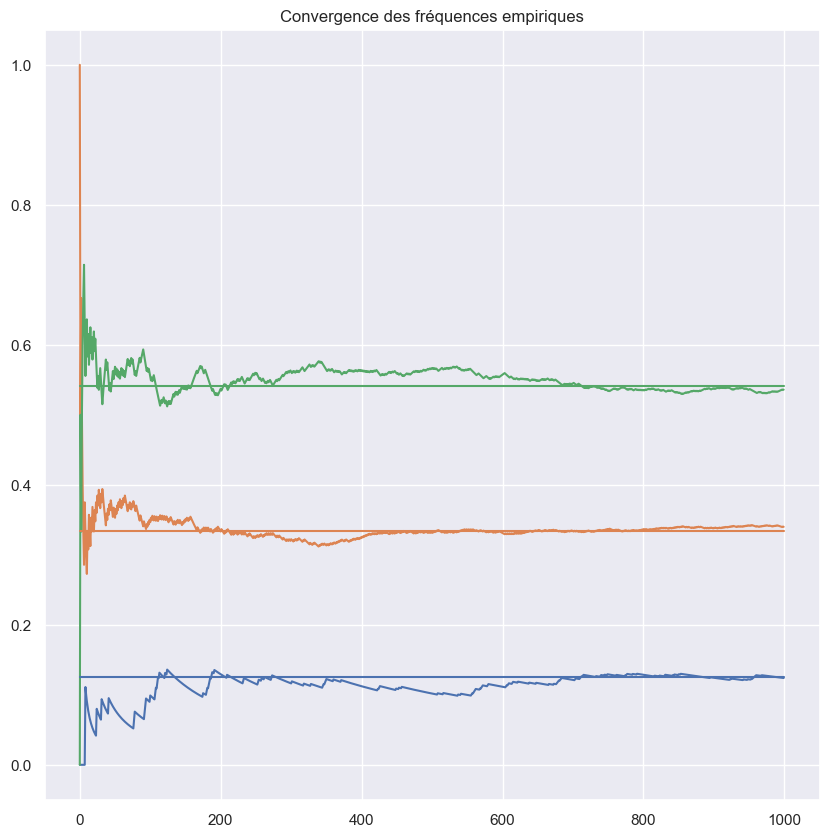

In [18]:
res = frequences_empiriques(P, pi, 1000)
inv = [1/8,1/3,13/24]
fig, ax = plt.subplots(figsize=(10,10))
for i in range(3):
    ax.plot(res[i])
ax.set_prop_cycle(None)
for i in range(3):
    ax.plot([0,1000],[inv[i],inv[i]])
ax.set_title("Convergence des fréquences empiriques")
plt.show()

# Partie 3

In [19]:
Pgraph = np.array(
[[0, 1/2, 1/2, 0],
[1/3, 0, 1/3, 1/3], 
[1/3, 1/3, 0, 1/3],
[0, 1/2, 1/2, 0]])
pigraph = np.array([1,0,0,0])

In [20]:
vgraph = ((np.linalg.eig(Pgraph.T)[1]).T)[0]
invgraph = vgraph/np.sum(vgraph)
invgraph

array([0.2, 0.3, 0.3, 0.2])

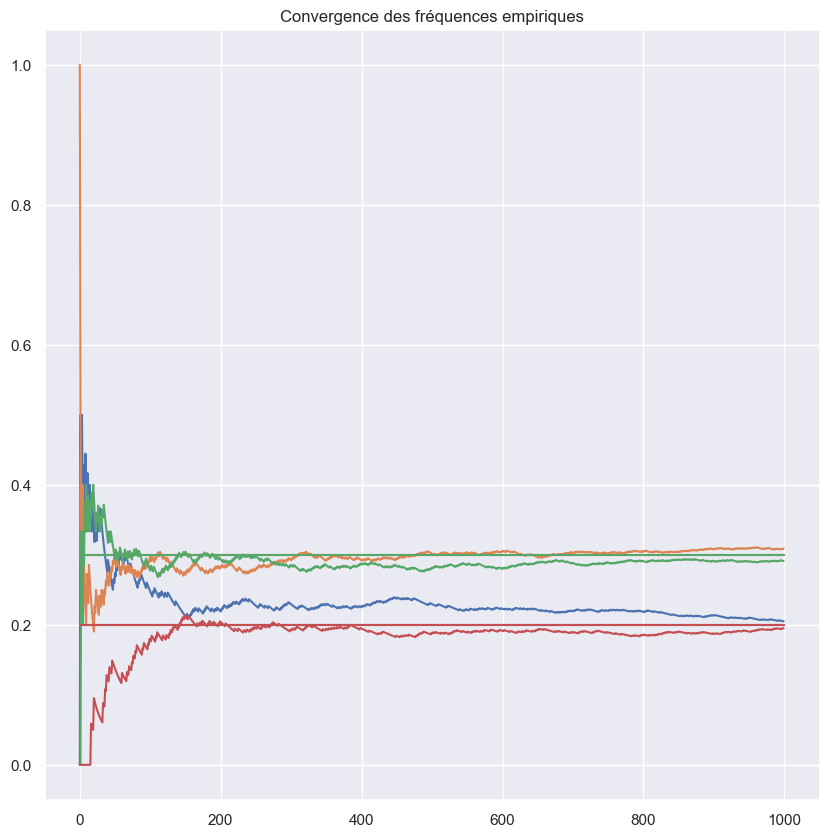

In [21]:
res = frequences_empiriques(Pgraph, pigraph, 1000)
fig, ax = plt.subplots(figsize=(10,10))
for i in range(4):
    ax.plot(res[i])
ax.set_prop_cycle(None)
for i in range(4):
    ax.plot([0,1000],[invgraph[i],invgraph[i]])
ax.set_title("Convergence des fréquences empiriques")
plt.show()

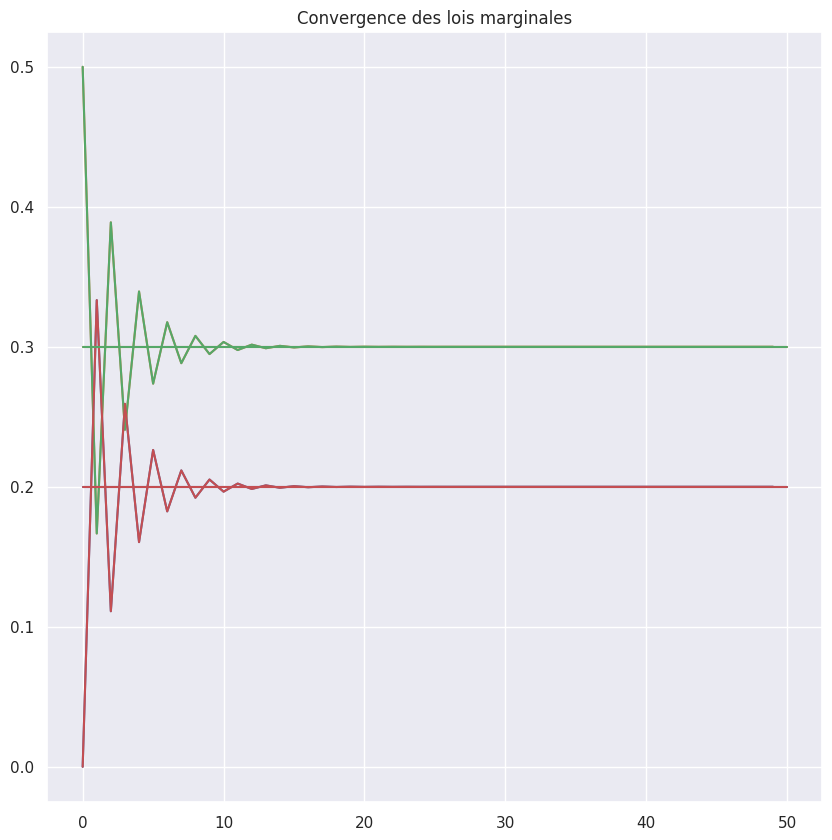

In [77]:
res = []
marginal = pigraph
for i in range(50):
    marginal = np.matmul(marginal, Pgraph)
    res.append(marginal)
res2 = np.array(res).T
fig, ax = plt.subplots(figsize=(10,10))
for i in range(4):
    ax.plot(res2[i])
ax.set_prop_cycle(None)
for i in range(4):
    ax.plot([0,50],[invgraph[i],invgraph[i]])
ax.set_title("Convergence des lois marginales")
plt.show()

# Partie 4

In [17]:
def matrice_ehrenfest(N):
    res = []
    res.append([1/2,1/2] + [0]*(N-1))
    for k in range(1,N):
        toadd = [0]*(k-1) + [(1/2) * k/N, 1/2, (1/2) * (N-k)/N] + [0]*(N-k-1)
        res.append(toadd)
    res.append([0]*(N-1) + [1/2,1/2])    
    return np.array(res)

def loi_invariante_ehrenfest(N):
    return np.array([math.comb(N,k)/(2**N) for k in range(N+1)])

In [18]:
v = loi_invariante_ehrenfest(10)
PE = matrice_ehrenfest(10)
v, np.matmul(v,PE)

(array([0.00097656, 0.00976562, 0.04394531, 0.1171875 , 0.20507812,
        0.24609375, 0.20507812, 0.1171875 , 0.04394531, 0.00976562,
        0.00097656]),
 array([0.00097656, 0.00976562, 0.04394531, 0.1171875 , 0.20507812,
        0.24609375, 0.20507812, 0.1171875 , 0.04394531, 0.00976562,
        0.00097656]))

In [19]:
np.linalg.eig(PE)[0]

array([0. , 0.1, 0.2, 1. , 0.3, 0.9, 0.4, 0.8, 0.5, 0.6, 0.7])

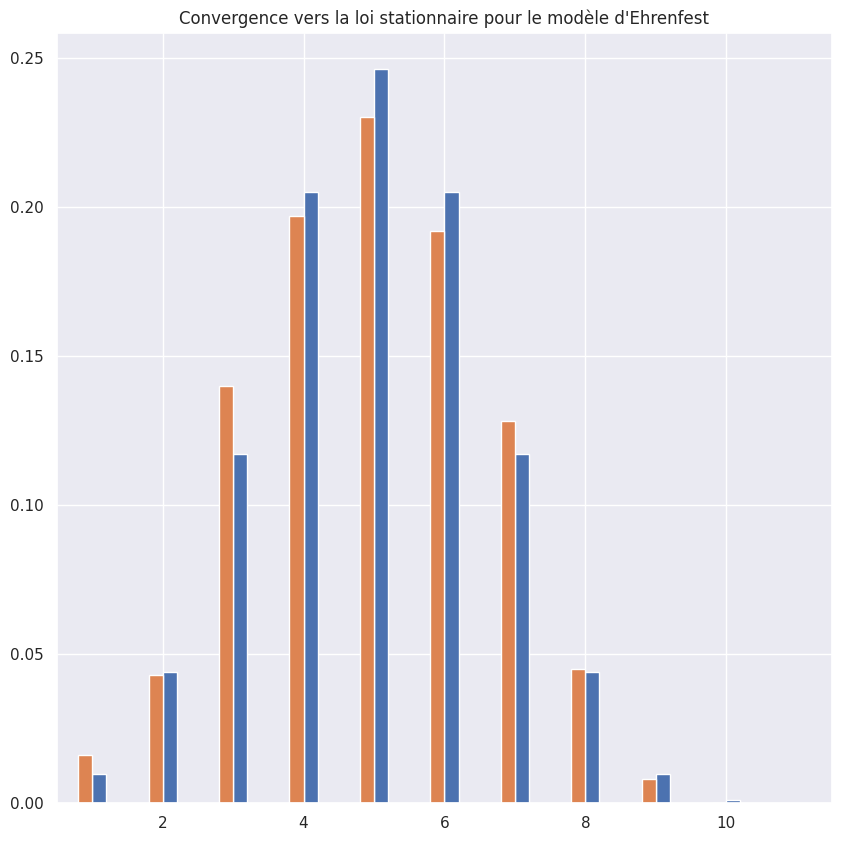

In [21]:
simulations = [chaine_markov(PE, [1]+[0]*10, 100)[-1] - 1 for i in range(1000)]
frequences = np.array([simulations.count(i)/1000 for i in range(11)])
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(range(11), v, width=0.2, align="edge", color=sns.color_palette()[0])
ax.bar(range(11), frequences, width=-0.2, align="edge", color=sns.color_palette()[1])
ax.set_title("Convergence vers la loi stationnaire pour le modèle d'Ehrenfest")
ax.set_xlim([0.5,11.5])
plt.show()